In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
Hero_Map = pd.read_csv('HeroIDAndMapID.csv')
Hero_Map.head()

,ID,Name,Group,SubGroup
0,0,Unknown,NaN,NaN
1,1,Abathur,Specialist,Utility
2,2,Anub'arak,Warrior,Tank
3,3,Arthas,Warrior,Bruiser
4,4,Azmodan,Specialist,Siege


In [3]:
Rep_Char = pd.read_csv('ReplayCharacters.csv')
Rep_Char.head()

,ReplayID,Is Auto Select,HeroID,Hero Level,Is Winner,MMR Before,In Game Level,Takedowns,Killing Blows,Assists,Deaths,Highest Kill Streak,Hero Damage,Siege Damage,Healing,Self Healing,Damage Taken,Experience Contribution,Time Spent Dead,Merc Camp Captures
0,123345991,0,51,7,1,2039.0,23,20,7,13,4,14,44325,61182,NaN,0,NaN,15822,00:03:56,0
1,123345991,0,71,2,1,1883.0,23,21,0,21,5,7,26621,70658,NaN,0,NaN,16938,00:02:37,0
2,123345991,0,52,20,0,1889.0,22,10,2,8,6,2,29858,38445,NaN,0,NaN,11353,00:03:40,0
3,123345991,0,71,4,0,1987.0,22,12,1,11,7,4,25886,38857,NaN,0,NaN,10616,00:03:41,1
4,123345991,0,12,16,0,2153.0,22,11,6,5,6,5,29978,128030,NaN,8767,NaN,21554,00:04:08,5


In [4]:
Rep = pd.read_csv('Replays.csv')
Rep.head()

,ReplayID,GameMode(3=Quick Match 4=Hero League 5=Team League 6=Unranked Draft),MapID,Replay Length,Timestamp (UTC)
0,123345991,3,1008,00:20:59,9/8/2017 3:01:01 AM
1,127221556,3,1008,00:19:10,9/8/2017 3:01:01 AM
2,126750478,3,1009,00:13:40,9/8/2017 3:01:03 AM
3,124194255,3,1004,00:24:22,9/8/2017 3:01:08 AM
4,125539156,3,1007,00:23:51,9/8/2017 3:01:09 AM


# Replay_character 필요 칼럼만 모으기

In [8]:
Rep_Char1 = Rep_Char[['ReplayID','HeroID','Hero Level','Is Winner','In Game Level','Takedowns','Killing Blows','Assists','Deaths','Hero Damage','Siege Damage','Healing','Self Healing','Damage Taken','Time Spent Dead']]
Rep_Char1.head()


,ReplayID,HeroID,Hero Level,Is Winner,In Game Level,Takedowns,Killing Blows,Assists,Deaths,Hero Damage,Siege Damage,Healing,Self Healing,Damage Taken,Time Spent Dead
0,123345991,51,7,1,23,20,7,13,4,44325,61182,NaN,0,NaN,00:03:56
1,123345991,71,2,1,23,21,0,21,5,26621,70658,NaN,0,NaN,00:02:37
2,123345991,52,20,0,22,10,2,8,6,29858,38445,NaN,0,NaN,00:03:40
3,123345991,71,4,0,22,12,1,11,7,25886,38857,NaN,0,NaN,00:03:41
4,123345991,12,16,0,22,11,6,5,6,29978,128030,NaN,8767,NaN,00:04:08


# 1. 숙련도와 승률간의 관계

In [9]:
# 일단 Replay_character 파일에서 is winner 랑 Hero Level이랑 묶기
Rep_Char01 = Rep_Char1[['Is Winner','Hero Level']]
Rep_Char01.head()

,Is Winner,Hero Level
0,1,7
1,1,2
2,0,20
3,0,4
4,0,16


In [14]:
h=0;
for i in range(0,950000):
    b = 10*i + 10;
    a = Rep_Char01[10*i:b]
    a1 = a[a['Is Winner'] == 0]
    a2 = a1['Hero Level'].sum()
    a3 = a[a['Is Winner'] == 1]
    a4 = a3['Hero Level'].sum()
    if a2<a4:
        h = h+1
    else:
        h = h
    if i%10000==0:
        print("now ongoing...",i)
h

now ongoing...%d 0
now ongoing...%d 10000
now ongoing...%d 20000
now ongoing...%d 30000
now ongoing...%d 40000
now ongoing...%d 50000
now ongoing...%d 60000
now ongoing...%d 70000
now ongoing...%d 80000
now ongoing...%d 90000
now ongoing...%d 100000
now ongoing...%d 110000
now ongoing...%d 120000
now ongoing...%d 130000
now ongoing...%d 140000
now ongoing...%d 150000
now ongoing...%d 160000
now ongoing...%d 170000
now ongoing...%d 180000
now ongoing...%d 190000
now ongoing...%d 200000
now ongoing...%d 210000
now ongoing...%d 220000
now ongoing...%d 230000
now ongoing...%d 240000
now ongoing...%d 250000
now ongoing...%d 260000
now ongoing...%d 270000
now ongoing...%d 280000
now ongoing...%d 290000
now ongoing...%d 300000
now ongoing...%d 310000
now ongoing...%d 320000
now ongoing...%d 330000
now ongoing...%d 340000
now ongoing...%d 350000
now ongoing...%d 360000
now ongoing...%d 370000
now ongoing...%d 380000
now ongoing...%d 390000
now ongoing...%d 400000
now ongoing...%d 410000
now on

510475

In [13]:
mapID = 1003     # 1001 ~ 1020
size = 10000
add = 50000
a=Rep
a1 = a[a['MapID'] == mapID]
b = pd.merge(Rep_Char, a1, how='inner', left_on = 'ReplayID', right_on='ReplayID')
b['Alive Time']=0
for i in range(add, size+add):
    b['Alive Time'][i]=(datetime.datetime.strptime(b['Replay Length'][i], "%H:%M:%S") - datetime.datetime.strptime(b['Time Spent Dead'][i], "%H:%M:%S")).total_seconds()
b_sampled = b[add:size+add]
b_sampled['Total_Damage'] = b_sampled['Hero Damage']+b_sampled['Siege Damage']

b_sampled['DPS_Total'] = b_sampled['Total_Damage']/b_sampled['Alive Time']
b_sampled['DPS_vsHero'] = b_sampled['Hero Damage']/b_sampled['Alive Time']
b_sampled['DPS_vsSiege'] = b_sampled['Siege Damage']/b_sampled['Alive Time']
b_sampled['DPS_DMG_Taken'] = b_sampled['Damage Taken']/b_sampled['Alive Time']
b_sampled['DPS_Healing'] = (b_sampled['Healing']+b_sampled['Self Healing'])/b_sampled['Alive Time']
dps_by_hero = b_sampled[['HeroID', 'DPS_Total', 'DPS_vsHero', 'DPS_vsSiege', 'DPS_DMG_Taken', 'DPS_Healing']].groupby('HeroID')[['DPS_Total', 'DPS_vsHero', 'DPS_vsSiege','DPS_DMG_Taken' ,'DPS_Healing']].mean()

print("Map is loaded, DataSize: ", size)

C:\Users\stmds\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Map is loaded, DataSize:  10000


C:\Users\stmds\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\stmds\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\stmds\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [38]:
want = 4         # 0: DPS_Total, 1: DPS_vsHero, 2: DPS_vsSiege, 3: DPS_DMG_Taken, 4: DPS_Healing
tmp = ""

if want ==0 :
    tmp = 'DPS_Total'
elif want == 1:
    tmp = 'DPS_vsHero'
elif want == 2:
    tmp = 'DPS_vsSiege'
elif want == 3:
    tmp = 'DPS_DMG_Taken'
elif want == 4:
    tmp = 'DPS_Healing'
NO1 = dps_by_hero[tmp].sort_values(ascending = False).index[0]
Hero_Map[Hero_Map['ID']==NO1]['Name']
dps_by_hero[tmp].sort_values(ascending = False)

HeroID
63    66.358864
42    62.654777
69    56.490346
5     54.893436
16    52.821316
55    52.148905
57    50.949418
18    50.909041
37    47.768417
19    46.568040
25    44.595636
30    40.403653
8     28.398824
35    23.031859
36    22.951655
27    22.916789
44    22.263911
17    20.037674
13    19.705615
6     18.761233
68    18.558743
53    17.655896
64    17.557615
60    10.500993
61    10.065316
49     9.332640
1      9.326853
70     8.518130
4      7.299975
59     5.279087
        ...    
34     0.424544
47     0.383459
2           NaN
3           NaN
9           NaN
10          NaN
11          NaN
15          NaN
20          NaN
21          NaN
23          NaN
24          NaN
26          NaN
28          NaN
29          NaN
31          NaN
32          NaN
33          NaN
39          NaN
40          NaN
43          NaN
45          NaN
46          NaN
48          NaN
50          NaN
54          NaN
56          NaN
62          NaN
66          NaN
67          NaN
Name: DPS_Healing

In [87]:
NO1 = dps_by_hero['DPS_Healing'].sort_values(ascending = False).index[0]
Hero_Map[Hero_Map['ID']==NO1]['Name'] #No1영웅 서칭

42    Lt. Morales
Name: Name, dtype: object

In [41]:
c=b[b['HeroID']==69]['Is Winner'].count()
s=b[b['HeroID']==69]['Is Winner'].sum()
s/c #HeroID가 69인 영웅이 승리한 확률

0.475978835978836

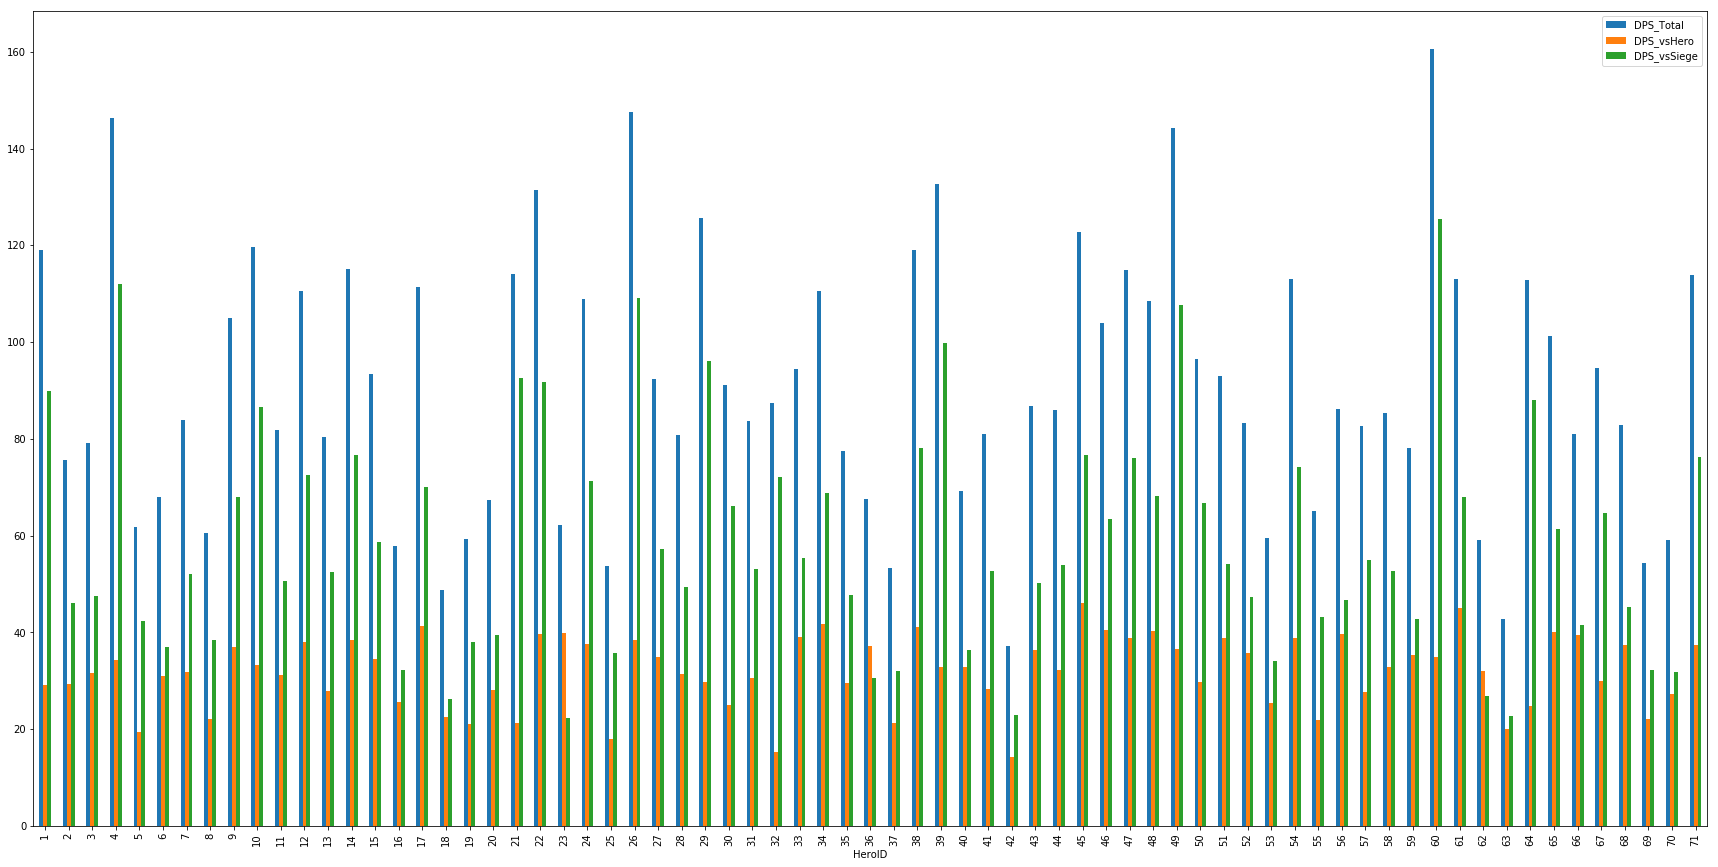

In [67]:
dps_by_hero.plot.bar(figsize=(30,15)) #hero별 DPS 그래프